In [5]:
import cv2
import keras
import keras.losses

from getABSDData import getABSDDataMask
from Model import RetrainedClassificationModel, SegNetModel

In [14]:
from Utilities.Metrics import precision, recall, f1, f2, iou, MetricsCallback, pred_area, true_area
keras.metrics.precision = precision
keras.metrics.recall = recall
keras.metrics.f1 = f1
keras.metrics.f2 = f2
keras.metrics.iou = iou
keras.metrics.pred_area = pred_area
keras.metrics.true_area = true_area

In [15]:
model = SegNetModel('noname', use_residual=False)
# model.load('noname.hd5')
# from keras.optimizers import SGD
# optimizer = SGD(lr=0.001, momentum=0.9, decay=0.0005, nesterov=False)
# model.model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[precision, recall, f1, f2, iou, pred_area, true_area, "accuracy"])
# model.model = keras.models.load_model('noname.hd5')
# model = RetrainedClassificationModel('noname')
# model.load('tcm.212-0.15.hdf5')

Done building encoder..
Done building decoder..


In [16]:
acc = model.eval(batch_size=4)

KeyboardInterrupt: 

In [13]:
n_training_images = 4
image_size = 224
# image_converter = lambda x: x/255
# training, dev, _ = getABSDDataMask(n_training_images, image_converter=image_converter, remove_nan=True, reduced_size=100)
label_converter = lambda x: cv2.resize(x, (image_size, image_size))
image_converter = lambda x: keras.applications.vgg16.preprocess_input(label_converter(x))

training, dev, _ = getABSDDataMask(n_training_images, label_converter=label_converter, image_converter=image_converter,
                                   reduced_size=16, remove_nan=True)

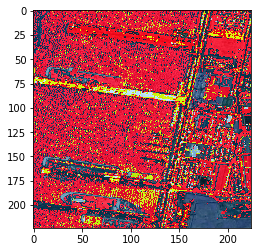

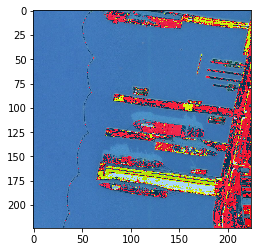

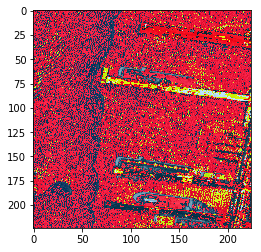

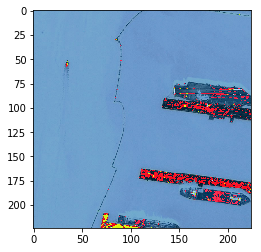

In [14]:
i, m = training[1]
import matplotlib .pyplot as plt
import numpy as np
for id in range(n_training_images):
    plt.imshow((i[id, :, :, :] * 255).astype(np.uint8))
    plt.show()
#     plt.imshow(m[id, :].reshape((image_size, image_size)))
#     plt.show()

In [6]:

training, dev, _ = getABSDDataMask(n_training_images, label_converter=label_converter, image_converter=image_converter,
                                   reduced_size=10, remove_nan=True)

In [7]:
len(training)

2

In [9]:
p = model.model.predict(i, batch_size=2)
for id in range(n_training_images):
    plt.imshow((p[id, :]/p[id, :].max()).reshape((image_size, image_size)) > 0.5)
    plt.show()

NameError: name 'model' is not defined